# Importing libraraies and loading data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [75]:
df=pd.read_csv('/content/drive/MyDrive/Occupancy_Estimation.csv')

In [76]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,12/22/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,12/22/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,12/22/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,12/22/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,12/22/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# EDA

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [78]:
df.shape

(10129, 19)

In [79]:
df.isnull().sum().sum()

0

In [80]:
df.duplicated().sum()

0

In [81]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


<ipython-input-82-3a3c4b9d89d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


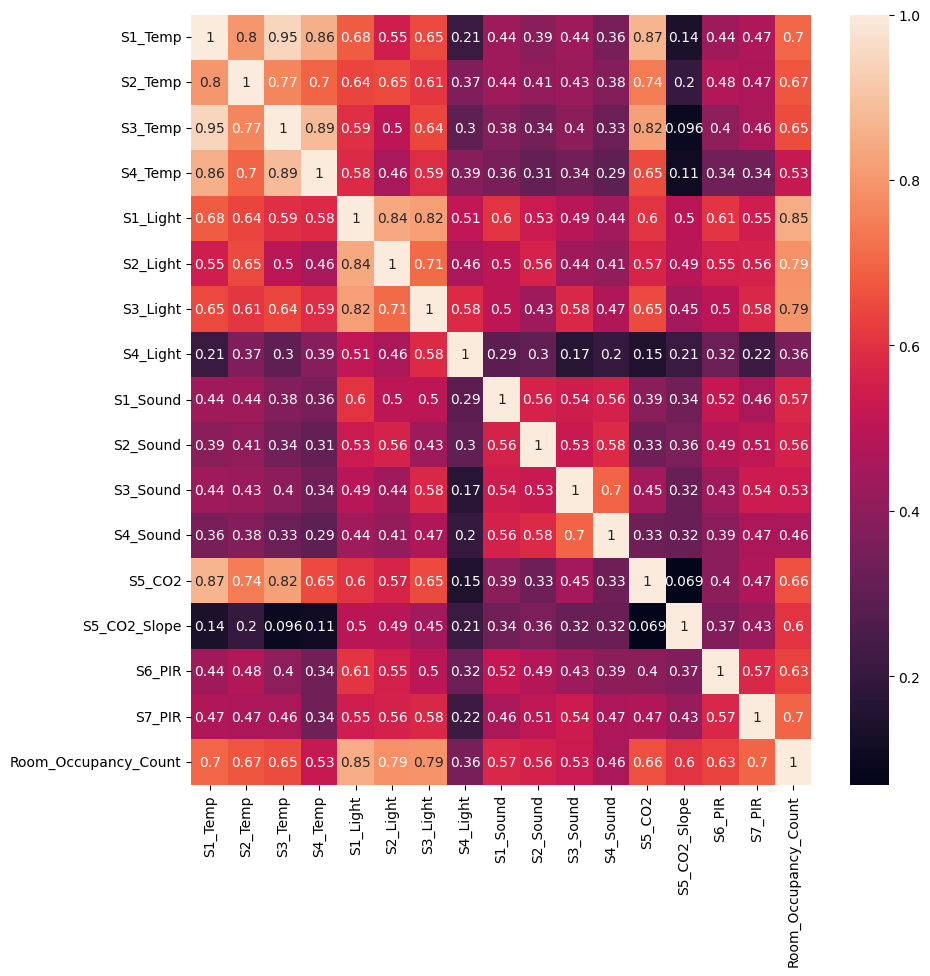

In [82]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

***From the correlation matrix represented by the heatmap, it's clear that the temperature and light sensors on nodes 1,2, and 3, in addition to PIR sensor on both nodes 6 and 7, and the CO2 sensor on node 5 have stronger relationships with the label (Room occupancy counts) than other sensors such as the sound sensors on nodes 1-4. Furthermore, the temperature, light, and sound sensors on desk 4, have the least correlation compared to other sensors.***

<Axes: xlabel='Room_Occupancy_Count', ylabel='count'>

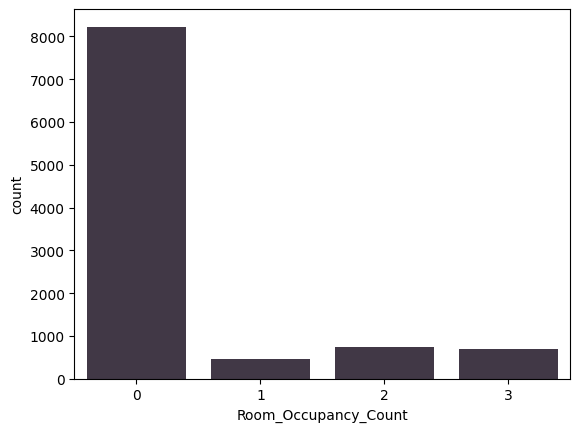

In [83]:
sns.countplot(x='Room_Occupancy_Count',data=df, color= '#423648')

In [84]:
df['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

***From the barplot, we can see that in almost 8200 intances there was no occupants in the room, but the number of instances where the occupants were 1, 2, or 3 was much lower, so it's clear that the data is not balaced.***

In [85]:
df['Hour']=df['Time'].str.split(':').str[0]
df['Hour']

0        10
1        10
2        10
3        10
4        10
         ..
10124     8
10125     8
10126     8
10127     8
10128     9
Name: Hour, Length: 10129, dtype: object

<Axes: xlabel='Hour', ylabel='count'>

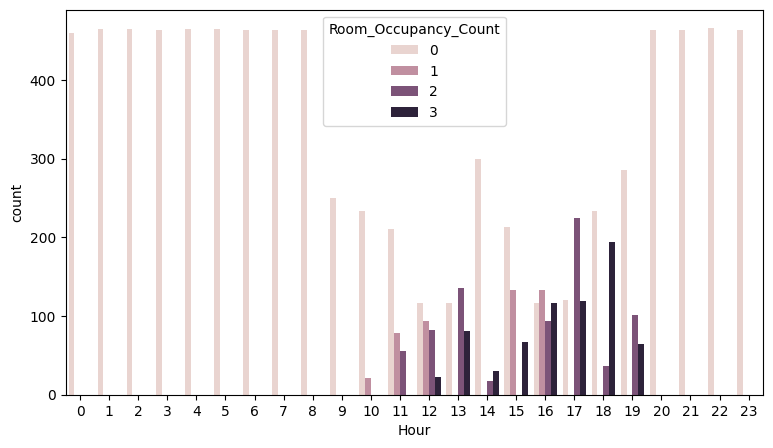

In [86]:
df['Hour']=df['Hour'].astype(int)
fig= plt.figure(figsize = (9, 5))
sns.countplot(x='Hour',hue='Room_Occupancy_Count',data=df)

***I created a column called 'Hour' that takes the hour only out of the 'Time' column, to know if there is some times that the number of occupants is more than others, and from the plot above which shows the number of occupants count in each hour I recognized that most of the times there is no one in the room especially during the night and early morning. The hours from 10- 19, are the hours were there are occupants in the room but not always.***

In [87]:
Days_dict={'12/22/2017':1,'12/23/2017':2,'12/24/2017':3,'12/25/2017':4,'12/26/2017':5,'1/10/2018':6,'1/11/2018':7}
df['Day']=df['Date'].replace(Days_dict)

In [88]:
df['Day'].nunique()
df['Day'].value_counts()

2    2779
4    1716
1    1462
3    1064
5    1063
7    1048
6     997
Name: Day, dtype: int64

***As the date column contains 7 dates only, I decided to create a new column called 'Day' which has values from 1-7 each represent the number of the day of collecting the data. The 'Day' column is easier to deal with than the 'Date' as numbers are more flexible than dates. Using the 'Day' column, I can also create a dataframe for each day alone,  which is done in the cells below.***

In [89]:
day_1_df=df[df['Day']==1]
day_1_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
0,12/22/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.19,0.06,0.06,390,0.769231,0,0,1,10,1
1,12/22/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.05,0.06,0.06,390,0.646154,0,0,1,10,1
2,12/22/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.11,0.08,0.06,390,0.519231,0,0,1,10,1
3,12/22/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.10,0.10,0.09,390,0.388462,0,0,1,10,1
4,12/22/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,0.06,0.06,390,0.253846,0,0,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,12/22/2017,23:57:30,25.44,25.44,25.00,25.75,0,0,0,0,...,0.10,0.11,0.06,380,0.000000,0,0,0,23,1
1458,12/22/2017,23:58:01,25.38,25.44,25.00,25.75,0,0,0,0,...,0.05,0.06,0.06,380,0.000000,0,0,0,23,1
1459,12/22/2017,23:58:32,25.44,25.44,24.94,25.75,0,0,0,0,...,0.05,0.06,0.06,380,0.000000,0,0,0,23,1
1460,12/22/2017,23:59:02,25.44,25.44,25.00,25.81,0,0,0,0,...,0.05,0.06,0.05,380,0.000000,0,0,0,23,1


In [90]:
day_1_df['Room_Occupancy_Count'].value_counts()

0    637
3    363
2    257
1    205
Name: Room_Occupancy_Count, dtype: int64

In [91]:
day_2_df=df[df['Day']==2]
day_2_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
1462,12/23/2017,0:00:34,25.44,25.44,24.94,25.81,0,0,0,0,...,0.05,0.06,0.06,380,0.000000,0,0,0,0,2
1463,12/23/2017,0:01:05,25.38,25.44,25.00,25.81,0,0,0,0,...,0.05,0.06,0.06,380,0.000000,0,0,0,0,2
1464,12/23/2017,0:01:36,25.38,25.44,25.00,25.81,0,0,0,0,...,0.05,0.06,0.06,380,0.000000,0,0,0,0,2
1465,12/23/2017,0:02:06,25.38,25.44,25.00,25.81,0,0,0,0,...,0.05,0.08,0.06,380,0.000000,0,0,0,0,2
1466,12/23/2017,0:02:37,25.38,25.44,25.00,25.81,0,0,0,0,...,0.05,0.06,0.06,380,0.000000,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4236,12/23/2017,23:57:52,25.44,25.44,24.94,25.63,0,0,0,0,...,0.04,0.05,0.07,370,-0.292308,0,0,0,23,2
4237,12/23/2017,23:58:22,25.38,25.38,25.00,25.63,0,0,0,0,...,0.06,0.06,0.06,370,-0.288462,0,0,0,23,2
4238,12/23/2017,23:58:53,25.44,25.44,24.94,25.56,0,0,0,0,...,0.04,0.06,0.05,370,-0.280769,0,0,0,23,2
4239,12/23/2017,23:59:24,25.44,25.44,24.94,25.63,0,0,0,0,...,0.05,0.06,0.06,370,-0.269231,0,0,0,23,2


In [92]:
day_2_df['Room_Occupancy_Count'].value_counts()

0    1997
2     398
1     254
3     130
Name: Room_Occupancy_Count, dtype: int64

In [93]:
day_3_df=df[df['Day']==3]
day_3_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
4241,12/24/2017,0:00:56,25.44,25.44,24.94,25.63,0,0,0,0,...,0.05,0.06,0.06,370,-2.346154e-01,0,0,0,0,3
4242,12/24/2017,0:01:26,25.44,25.44,25.00,25.56,0,0,0,0,...,0.05,0.06,0.05,370,-2.115385e-01,0,0,0,0,3
4243,12/24/2017,0:01:57,25.44,25.44,25.00,25.63,0,0,0,0,...,0.05,0.06,0.07,370,-1.846154e-01,0,0,0,0,3
4244,12/24/2017,0:02:28,25.44,25.44,25.00,25.56,0,0,0,0,...,0.05,0.05,0.06,370,-1.538462e-01,0,0,0,0,3
4245,12/24/2017,0:02:58,25.44,25.44,25.00,25.56,0,0,0,0,...,0.05,0.07,0.06,370,-1.192308e-01,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,12/24/2017,9:08:47,25.13,25.13,24.69,25.44,7,7,36,24,...,0.05,0.07,0.07,360,-7.692308e-03,0,0,0,9,3
5301,12/24/2017,9:09:18,25.13,25.13,24.69,25.44,7,7,36,24,...,0.05,0.06,0.07,360,1.153846e-02,0,0,0,9,3
5302,12/24/2017,9:09:48,25.13,25.13,24.69,25.50,7,7,36,24,...,0.06,0.06,0.06,360,3.076923e-02,0,0,0,9,3
5303,12/24/2017,9:10:19,25.13,25.13,24.69,25.44,7,7,37,24,...,0.04,0.06,0.07,360,-2.460000e-17,0,0,0,9,3


In [94]:
day_3_df['Room_Occupancy_Count'].value_counts()

0    1064
Name: Room_Occupancy_Count, dtype: int64

In [95]:
day_4_df=df[df['Day']==4]
day_4_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
5305,12/25/2017,9:11:42,25.00,25.00,24.50,25.31,7,7,36,24,...,0.04,0.06,0.09,355,-0.111538,0,0,0,9,4
5306,12/25/2017,9:12:12,25.00,25.06,24.56,25.31,7,7,36,24,...,0.04,0.07,0.10,355,-0.138462,0,0,0,9,4
5307,12/25/2017,9:12:43,25.00,25.00,24.56,25.38,7,7,36,24,...,0.05,0.06,0.11,355,-0.161538,0,0,0,9,4
5308,12/25/2017,9:13:13,25.00,25.00,24.56,25.31,7,7,36,24,...,0.05,0.06,0.10,355,-0.180769,0,0,0,9,4
5309,12/25/2017,9:13:44,25.06,25.00,24.50,25.31,7,7,36,24,...,0.05,0.06,0.10,355,-0.196154,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,12/25/2017,23:57:33,25.38,25.38,25.00,25.88,0,0,0,0,...,0.05,0.06,0.09,355,0.000000,0,0,0,23,4
7017,12/25/2017,23:58:04,25.38,25.38,25.00,25.88,0,0,0,0,...,0.05,0.06,0.09,355,0.000000,0,0,0,23,4
7018,12/25/2017,23:58:35,25.38,25.38,25.00,25.88,0,0,0,0,...,0.05,0.06,0.10,355,0.000000,0,0,0,23,4
7019,12/25/2017,23:59:05,25.38,25.38,24.94,25.81,0,0,0,0,...,0.05,0.07,0.10,355,0.000000,0,0,0,23,4


In [96]:
day_4_df['Room_Occupancy_Count'].value_counts()

0    1716
Name: Room_Occupancy_Count, dtype: int64

In [97]:
day_5_df=df[df['Day']==5]
day_5_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
7021,12/26/2017,0:00:37,25.38,25.38,25.00,25.81,0,0,0,0,...,0.06,0.07,0.10,355,0.0,0,0,0,0,5
7022,12/26/2017,0:01:08,25.38,25.38,25.00,25.81,0,0,0,0,...,0.05,0.06,0.08,355,0.0,0,0,0,0,5
7023,12/26/2017,0:01:39,25.38,25.38,25.00,25.88,0,0,0,0,...,0.05,0.06,0.09,355,0.0,0,0,0,0,5
7024,12/26/2017,0:02:09,25.38,25.38,25.00,25.88,0,0,0,0,...,0.05,0.06,0.10,355,0.0,0,0,0,0,5
7025,12/26/2017,0:02:40,25.38,25.38,25.00,25.88,0,0,0,0,...,0.05,0.06,0.10,355,0.0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,12/26/2017,9:07:58,25.06,25.06,24.69,25.25,6,7,34,22,...,0.05,0.07,0.10,350,0.0,0,0,0,9,5
8080,12/26/2017,9:08:29,25.06,25.06,24.69,25.25,6,7,34,22,...,0.05,0.06,0.09,350,0.0,0,0,0,9,5
8081,12/26/2017,9:08:59,25.06,25.06,24.69,25.25,6,7,34,22,...,0.05,0.07,0.10,350,0.0,0,0,0,9,5
8082,12/26/2017,9:09:30,25.06,25.06,24.63,25.25,6,7,34,22,...,0.05,0.06,0.09,350,0.0,0,0,0,9,5


In [98]:
day_5_df['Room_Occupancy_Count'].value_counts()

0    1063
Name: Room_Occupancy_Count, dtype: int64

In [99]:
day_6_df=df[df['Day']==6]
day_6_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
8084,1/10/2018,15:25:48,25.50,25.63,25.31,25.63,10,11,56,35,...,0.43,0.95,0.24,370,0.184615,1,1,3,15,6
8085,1/10/2018,15:26:19,25.50,25.63,25.31,25.63,10,12,56,35,...,0.36,0.40,0.09,370,0.353846,0,1,3,15,6
8086,1/10/2018,15:26:49,25.50,25.69,25.38,25.69,10,12,56,36,...,0.05,0.08,0.08,370,0.507692,0,0,3,15,6
8087,1/10/2018,15:27:20,25.50,25.69,25.38,25.63,10,12,57,36,...,0.57,0.13,0.09,370,0.646154,0,1,3,15,6
8088,1/10/2018,15:27:51,25.50,25.69,25.31,25.63,10,11,57,36,...,0.28,0.09,0.09,370,0.769231,1,0,3,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,1/10/2018,23:57:55,25.25,25.31,24.88,25.38,0,0,0,0,...,0.09,0.13,0.08,345,0.000000,0,0,0,23,6
9077,1/10/2018,23:58:26,25.25,25.31,24.88,25.38,0,0,0,0,...,0.04,0.06,0.09,345,0.000000,0,0,0,23,6
9078,1/10/2018,23:58:56,25.25,25.31,24.88,25.31,0,0,0,0,...,0.05,0.05,0.08,345,0.000000,0,0,0,23,6
9079,1/10/2018,23:59:27,25.25,25.31,24.88,25.38,0,0,0,0,...,0.04,0.05,0.09,345,0.000000,0,0,0,23,6


In [100]:
day_6_df['Room_Occupancy_Count'].value_counts()

0    703
3    201
2     93
Name: Room_Occupancy_Count, dtype: int64

In [101]:
day_7_df=df[df['Day']==7]
day_7_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
9081,1/11/2018,0:00:28,25.25,25.25,24.88,25.38,0,0,0,0,...,0.05,0.06,0.08,345,0.0,0,0,0,0,7
9082,1/11/2018,0:00:59,25.25,25.25,24.88,25.31,0,0,0,0,...,0.05,0.06,0.08,345,0.0,0,0,0,0,7
9083,1/11/2018,0:01:29,25.25,25.31,24.81,25.31,0,0,0,0,...,0.04,0.05,0.09,345,0.0,0,0,0,0,7
9084,1/11/2018,0:02:00,25.25,25.31,24.88,25.31,0,0,0,0,...,0.05,0.05,0.09,345,0.0,0,0,0,0,7
9085,1/11/2018,0:02:31,25.25,25.25,24.88,25.31,0,0,0,0,...,0.05,0.06,0.09,345,0.0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,1/11/2018,8:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0.04,0.06,0.08,345,0.0,0,0,0,8,7
10125,1/11/2018,8:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0.05,0.05,0.08,345,0.0,0,0,0,8,7
10126,1/11/2018,8:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0.05,0.06,0.08,345,0.0,0,0,0,8,7
10127,1/11/2018,8:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0.08,0.10,0.08,345,0.0,0,0,0,8,7


In [102]:
day_7_df['Room_Occupancy_Count'].value_counts()

0    1048
Name: Room_Occupancy_Count, dtype: int64

<Axes: xlabel='Day', ylabel='count'>

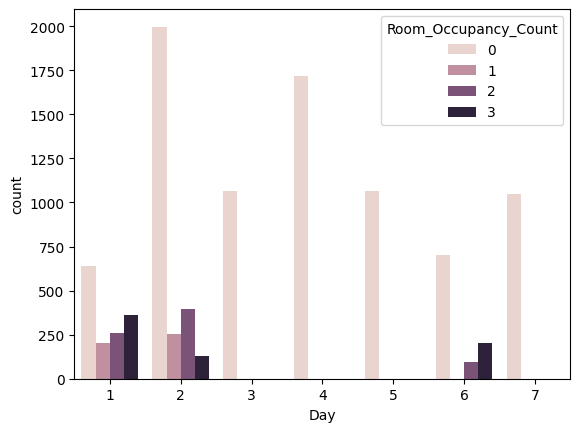

In [103]:
sns.countplot(x='Day',hue='Room_Occupancy_Count',data=df)

***I created a datafarame for each day for the following reasons:***

**1.   I can review and plot data for each day in an easier and clearer way because the number of instances in each df is much lower than the original df, and this is important as we are dealing with only 30 seconds duration between instances which makes it really hard to get clear insight and understadable plots for the whole data.**

**2.   Now it's clear that some days only contain 0 occupants, which means that no one entered the room during the data collection hours of that day, these days are days 3, 4, 5, and 7.**

**3.  Knowing that only day 1,2, and 6 had different number of occupants during the data collection hours, helps in analyzing data from sensors more efficietly, because we know that in these days, the readings will change in a noticible way indicating a change in the number of occupants, while sonsors data from the days where the number of occupants remains 0 is not expected to change.**

In [104]:
day_6_df = day_6_df.reset_index(drop=True)
day_6_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
0,1/10/2018,15:25:48,25.50,25.63,25.31,25.63,10,11,56,35,...,0.43,0.95,0.24,370,0.184615,1,1,3,15,6
1,1/10/2018,15:26:19,25.50,25.63,25.31,25.63,10,12,56,35,...,0.36,0.40,0.09,370,0.353846,0,1,3,15,6
2,1/10/2018,15:26:49,25.50,25.69,25.38,25.69,10,12,56,36,...,0.05,0.08,0.08,370,0.507692,0,0,3,15,6
3,1/10/2018,15:27:20,25.50,25.69,25.38,25.63,10,12,57,36,...,0.57,0.13,0.09,370,0.646154,0,1,3,15,6
4,1/10/2018,15:27:51,25.50,25.69,25.31,25.63,10,11,57,36,...,0.28,0.09,0.09,370,0.769231,1,0,3,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1/10/2018,23:57:55,25.25,25.31,24.88,25.38,0,0,0,0,...,0.09,0.13,0.08,345,0.000000,0,0,0,23,6
993,1/10/2018,23:58:26,25.25,25.31,24.88,25.38,0,0,0,0,...,0.04,0.06,0.09,345,0.000000,0,0,0,23,6
994,1/10/2018,23:58:56,25.25,25.31,24.88,25.31,0,0,0,0,...,0.05,0.05,0.08,345,0.000000,0,0,0,23,6
995,1/10/2018,23:59:27,25.25,25.31,24.88,25.38,0,0,0,0,...,0.04,0.05,0.09,345,0.000000,0,0,0,23,6


In [105]:
#To get the same columns that I want (8336:8387), I will subtract 8044 (the start index for day_6_df) from each
day_6_sample=day_6_df.iloc[252:303,:]
day_6_sample

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,Day
252,1/10/2018,17:36:00,25.94,26.19,25.88,25.94,145,230,170,19,...,0.43,0.45,0.21,840,1.107692,1,0,2,17,6
253,1/10/2018,17:36:31,25.94,26.19,25.88,25.94,146,230,169,18,...,0.61,3.11,0.38,840,0.957692,1,1,2,17,6
254,1/10/2018,17:37:01,25.94,26.19,25.88,25.94,144,229,170,19,...,0.53,1.57,0.22,830,0.688462,1,1,3,17,6
255,1/10/2018,17:37:32,25.94,26.25,25.88,25.94,142,227,8,8,...,0.53,0.82,0.21,830,0.450000,1,1,3,17,6
256,1/10/2018,17:38:03,25.94,26.25,25.88,25.94,143,227,8,8,...,0.80,0.28,0.14,830,0.196154,1,1,2,17,6
257,1/10/2018,17:38:33,25.94,26.19,25.88,25.94,142,228,8,8,...,0.49,0.20,0.16,835,0.023077,1,1,2,17,6
258,1/10/2018,17:39:04,25.94,26.19,25.88,25.94,142,228,7,8,...,0.43,0.20,0.13,825,-0.207692,1,1,2,17,6
259,1/10/2018,17:39:34,25.94,26.19,25.88,25.94,142,227,7,8,...,0.66,0.14,0.11,835,-0.250000,1,1,2,17,6
260,1/10/2018,17:40:05,25.94,26.19,25.88,25.94,142,226,7,8,...,0.31,0.23,0.18,830,-0.292308,0,1,2,17,6
261,1/10/2018,17:40:36,25.94,26.19,25.88,25.94,142,226,7,8,...,0.60,0.17,0.11,845,-0.242308,1,1,2,17,6


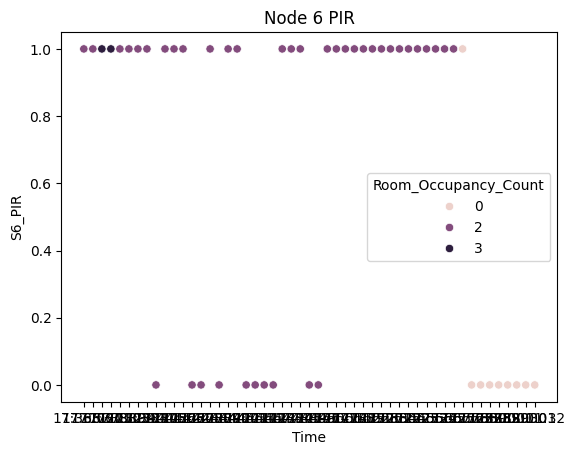

In [106]:
sns.scatterplot(x='Time',y='S6_PIR',hue='Room_Occupancy_Count',data=day_6_sample)
plt.title('Node 6 PIR')
plt.show()

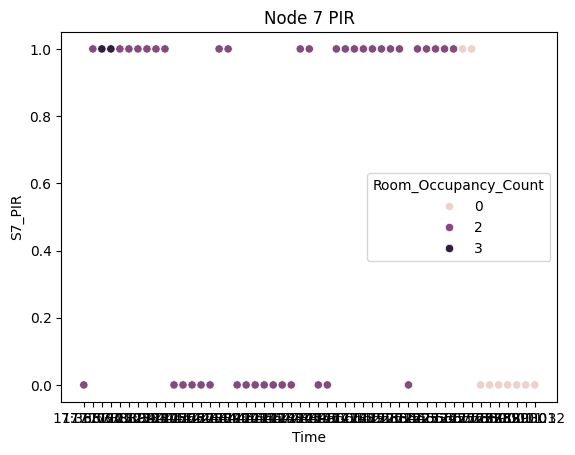

In [107]:
sns.scatterplot(x='Time',y='S7_PIR',hue='Room_Occupancy_Count',data=day_6_sample)
plt.title('Node 7 PIR')
plt.show()

I took a sample of 51 rows from day 6, which represents a 25 minutes. I visualized the values of the PIR sensor on node 6 and on node 7 as scatter plots, if the PIR sensor returned 0 then it means it didn't detect any changes, while 1 means there are some changes in the infrared radiation which means there are people or occupants in the room. The color of the points in the scatter plot indicate the room occupancy count for the observation. The aim of this was to now which sensor detects more points correctly, this is because the two sensors are in different places, and as expected, the PIR sensor on node 6 detected more correct points than the one on node 7, the location can be the reason for that, because node 6 was placed on the door while node 7 was placed on the window at the end of the room.

In [108]:
print('Max CO2 value: ',df['S5_CO2'].max())
print('Min CO2 value: ',df['S5_CO2'].min())

Max CO2 value:  1270
Min CO2 value:  345


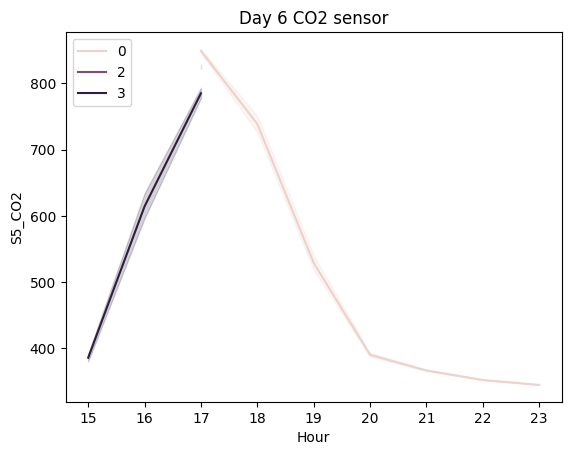

In [109]:
sns.lineplot(x='Hour',y='S5_CO2',hue='Room_Occupancy_Count',data=day_6_df)
plt.title('Day 6 CO2 sensor')
plt.legend(loc='upper left')
plt.show()

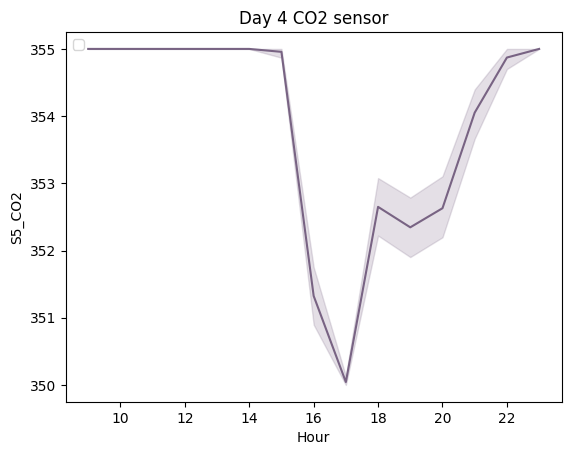

In [110]:
sns.lineplot(x='Hour',y='S5_CO2',color='#786383', data=day_4_df)
plt.title('Day 4 CO2 sensor')
plt.legend(loc='upper left')
plt.show()

**In order to understand the effect of the CO2 sensor which is placed on node 5, first I reviewed the maximum and minimum values for it from the original df, after that I visualized the values of it using a line plot and I used the hour instead of time over 2 days, day 6 where the number of occupants varied, and day 4 where there were no one occupants all day long. We can clearly notice that on day 6 where there were occupants in the room the CO2 levels was increasing, while when all occupants left, the CO2 levels began to decrease until it reached the normal values when no one is around which is less than 400. While on day 4, all values for the CO2 sensor was between 350 and 355 because no one entered the room. This shows that the level of the CO2 increases when there are occupants in the room, and it takes sometime to get back to its normal levels after the room becomes empty.**

In [111]:
#sns.pairplot(df)

# Data preprocessing

In [112]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'Hour', 'Day'],
      dtype='object')

In [113]:
df=df.drop(['Date','Time','Day','Hour'],axis=1)

In [114]:
scaler = MinMaxScaler()
columns=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound',
        'S3_Sound','S4_Sound', 'S5_CO2', 'S5_CO2_Slope']
df[columns]= scaler.fit_transform(df[columns])

In [115]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,0.356953,0.187308,0.352355,0.502546,0.154212,0.100838,0.122316,0.178652,0.028319,0.023549,0.032540,0.016072,0.125254,0.411819,0.090137,0.079574,0.398559
std,0.243993,0.137959,0.244161,0.220021,0.309159,0.260869,0.208574,0.264895,0.082908,0.078383,0.113949,0.036025,0.216178,0.076258,0.286392,0.270645,0.893633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.103529,0.142857,0.308642,0.000000,0.000000,0.000000,0.000000,0.002618,0.002941,0.005510,0.002985,0.010811,0.409114,0.000000,0.000000,0.000000
50%,0.305556,0.148235,0.285714,0.500000,0.000000,0.000000,0.000000,0.000000,0.005236,0.002941,0.005510,0.008955,0.016216,0.412135,0.000000,0.000000,0.000000
75%,0.479167,0.207059,0.537143,0.654321,0.072727,0.054264,0.178571,0.297297,0.005236,0.005882,0.008264,0.014925,0.129730,0.412135,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [116]:
X= df.drop('Room_Occupancy_Count',axis=1)
y= df['Room_Occupancy_Count']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random forest

**Simple Random Forest**

In [118]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_train=rfc.predict(X_train)
y_pred= rfc.predict(X_test)
rf_train_acc= accuracy_score(y_train, y_pred_train)
rf_acc= accuracy_score(y_test, y_pred)
rf_f1= f1_score(y_test, y_pred, average='macro')
rf_rec= recall_score(y_test,y_pred,average='macro')
rf_pre=  precision_score(y_test,y_pred,average='macro')
print('Train accuracy= ',rf_train_acc)
print('Accuracy= ',rf_acc)
print('F1 score= ',rf_f1)
print('Recall= ',rf_rec)
print('Precision= ',rf_pre)

Train accuracy=  1.0
Accuracy=  0.998025666337611
F1 score=  0.9937333361905918
Recall=  0.9933797909407666
Precision=  0.9941095293761321


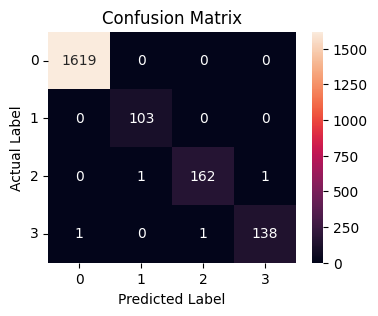

In [119]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

**Random forest with grid search**

In [121]:
rfc = RandomForestClassifier()
param_grid = {'criterion':['entropy','gini'],'n_estimators':[100,150,200,250],'max_features':['sqrt', 'log2']}
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_criterion = grid_search.best_params_['criterion']
best_numofestimators = grid_search.best_params_['n_estimators']
best_numoffeatures = grid_search.best_params_['max_features']
best_score=grid_search.best_score_
print('Best criterion: ',best_criterion)
print('Best number of estimates: ',best_numofestimators)
print('Best max number of features: ', best_numoffeatures)
print('Best score: ',best_score)

Best criterion:  entropy
Best number of estimates:  150
Best max number of features:  log2
Best score:  0.9974085498206412


In [122]:
y_pred_train=grid_search.predict(X_train)
y_pred=grid_search.predict(X_test)
rf_grid_search_train_acc= accuracy_score(y_train, y_pred_train)
rf_grid_search_acc= accuracy_score(y_test, y_pred)
rf_grid_search_f1= f1_score(y_test, y_pred, average='macro')
rf_grid_search_rec= recall_score(y_test,y_pred,average='macro')
rf_grid_search_pre=  precision_score(y_test,y_pred,average='macro')
print('Train accuracy= ',rf_grid_search_train_acc)
print('Accuracy= ',rf_grid_search_acc)
print('F1 score= ',rf_grid_search_f1)
print('Recall= ',rf_grid_search_rec)
print('Precision= ',rf_grid_search_pre)

Train accuracy=  1.0
Accuracy=  0.9985192497532083
F1 score=  0.9947129782640354
Recall=  0.9951655052264808
Precision=  0.9942766972291512


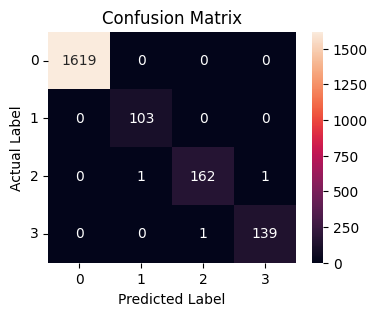

In [123]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

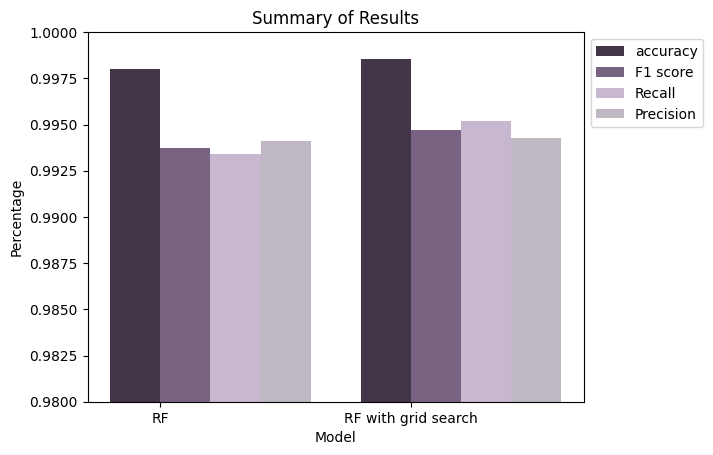

In [124]:
Model= ['RF','RF with grid search']
Accuracy= [rf_acc, rf_grid_search_acc]
F1_score= [rf_f1, rf_grid_search_f1]
Recall= [rf_rec,rf_grid_search_rec]
Precision= [rf_pre,rf_grid_search_pre]

X_axis = np.arange(len(Model))
plt.bar(X_axis+0.1, Accuracy, color='#423648' ,width = 0.20,label = 'accuracy')
plt.bar(X_axis+0.30, F1_score, color='#786383',width = 0.20,label = 'F1 score')
plt.bar(X_axis+0.50, Recall, color='#C7B8CF',width = 0.20,label = 'Recall')
plt.bar(X_axis+0.70, Precision, color='#BFB8C3',width = 0.20,label = 'Precision')

plt.xticks(X_axis+0.20,Model)
plt.ylim(0.98, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Model')
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

# SVM

**Simple SVM**

In [125]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_train=svm.predict(X_train)
y_pred= svm.predict(X_test)
svm_train_acc= accuracy_score(y_train, y_pred_train)
svm_acc= accuracy_score(y_test, y_pred)
svm_f1= f1_score(y_test, y_pred, average='macro')
svm_rec= recall_score(y_test,y_pred,average='macro')
svm_pre=  precision_score(y_test,y_pred,average='macro')
print('Train accuracy= ',svm_train_acc)
print('Accuracy= ',svm_acc)
print('F1 score= ',svm_f1)
print('Recall= ',svm_rec)
print('Precision= ',svm_pre)

Train accuracy=  0.9955572010366531
Accuracy=  0.9945705824284304
F1 score=  0.9814539131701079
Recall=  0.981925087108014
Precision=  0.9809988707611408


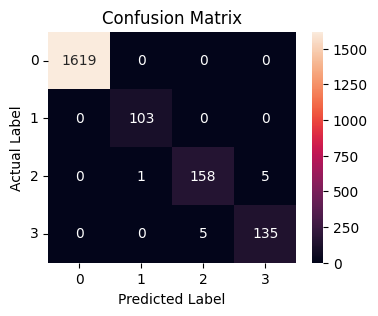

In [126]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

**SVM with grid search**

In [128]:
svm= SVC()
param_grid= {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[1,10,100,1000]}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_kernel= grid_search.best_params_['kernel']
best_C_value= grid_search.best_params_['C']
best_score=grid_search.best_score_
print('Best kernel: ',best_kernel)
print('Best C value: ',best_C_value)
print('Best score: ',best_score)

Best kernel:  linear
Best C value:  100
Best score:  0.9951871653681236


In [129]:
y_pred_train=grid_search.predict(X_train)
y_pred=grid_search.predict(X_test)
svm_grid_search_train_acc= accuracy_score(y_train, y_pred_train)
svm_grid_search_acc= accuracy_score(y_test, y_pred)
svm_grid_search_f1= f1_score(y_test, y_pred, average='macro')
svm_grid_search_rec= recall_score(y_test,y_pred,average='macro')
svm_grid_search_pre=  precision_score(y_test,y_pred,average='macro')
print('Train accuracy= ',svm_grid_search_train_acc)
print('Accuracy= ',svm_grid_search_acc)
print('F1 score= ',svm_grid_search_f1)
print('Recall= ',svm_grid_search_rec)
print('Precision= ',svm_grid_search_pre)

Train accuracy=  0.9961742564482291
Accuracy=  0.993583415597236
F1 score=  0.9795896749834464
Recall=  0.98161625449529
Precision=  0.9776034985277403


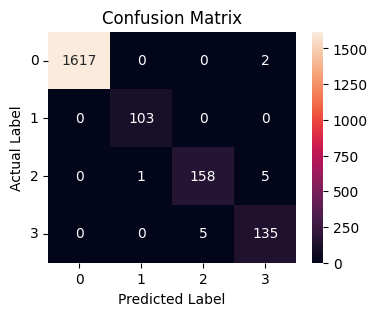

In [130]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

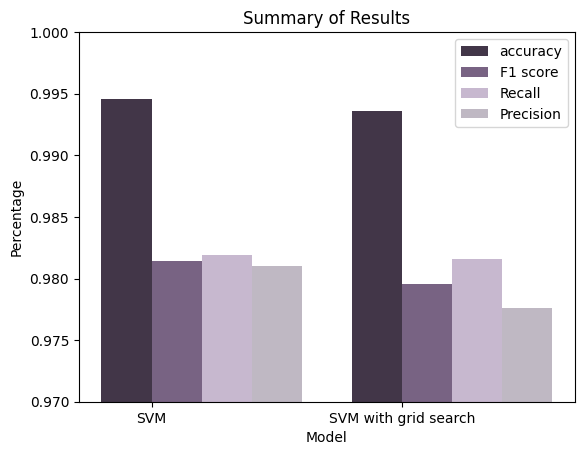

In [148]:
Model = ['SVM','SVM with grid search']
Accuracy = [svm_acc,svm_grid_search_acc]
F1_score = [svm_f1,svm_grid_search_f1]
Recall= [svm_rec,svm_grid_search_rec]
Precision= [svm_pre,svm_grid_search_pre]

X_axis = np.arange(len(Model))
plt.bar(X_axis+0.1, Accuracy, color='#423648' ,width = 0.20,label = 'accuracy')
plt.bar(X_axis+0.30, F1_score, color='#786383',width = 0.20,label = 'F1 score')
plt.bar(X_axis+0.50, Recall, color='#C7B8CF',width = 0.20,label = 'Recall')
plt.bar(X_axis+0.70, Precision, color='#BFB8C3',width = 0.20,label = 'Precision')

plt.xticks(X_axis+0.20,Model)
plt.ylim(0.97, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Model')
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

# Gradient Boosing

**Simple Gradient boosting**

In [132]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_train=gbc.predict(X_train)
y_pred= gbc.predict(X_test)
gb_train_acc= accuracy_score(y_train, y_pred_train)
gb_acc= accuracy_score(y_test, y_pred)
gb_f1= f1_score(y_test, y_pred, average='macro')
gb_rec= recall_score(y_test, y_pred, average='macro')
gb_pre= precision_score(y_test, y_pred, average='macro')
print('Train accuracy= ',gb_train_acc)
print('Accuracy= ',gb_acc)
print('F1 score= ',gb_f1)
print('Recall= ',gb_rec)
print('Precision= ',gb_pre)

Train accuracy=  1.0
Accuracy=  0.9950641658440277
F1 score=  0.9877772505628127
Recall=  0.9842968032058332
Precision=  0.9914350624909647


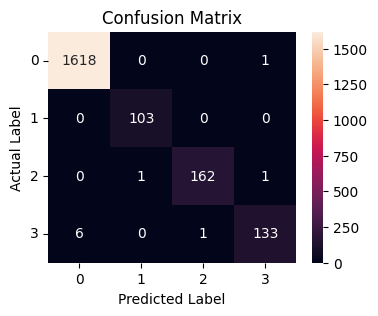

In [133]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

**Gradient boosting with grid search**

In [135]:
gbc=GradientBoostingClassifier()
param_grid = {'n_estimators':[100,200],'learning_rate':[0.1, 0.01],'max_depth': [8,16]}
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_numOfEstimators = grid_search.best_params_['n_estimators']
best_learningRate = grid_search.best_params_['learning_rate']
best_maxDepth = grid_search.best_params_['max_depth']
best_score=grid_search.best_score_
print('Best number of estimators: ', best_numOfEstimators)
print('Best learning rate value : ', best_learningRate)
print('Best max depth value : ', best_maxDepth )
print('Best score: ',best_score)

Best number of estimators:  200
Best learning rate value :  0.1
Best max depth value :  8
Best score:  0.9972850168696354


In [136]:
y_pred_train=grid_search.predict(X_train)
y_pred=grid_search.predict(X_test)
gb_grid_search_train_acc= accuracy_score(y_train, y_pred_train)
gb_grid_search_acc= accuracy_score(y_test, y_pred)
gb_grid_search_f1= f1_score(y_test, y_pred, average='macro')
gb_grid_search_rec= recall_score(y_test,y_pred,average='macro')
gb_grid_search_pre=  precision_score(y_test,y_pred,average='macro')
print('Train accuracy: ',gb_grid_search_train_acc)
print('Accuracy= ',gb_grid_search_acc)
print('F1 score= ',gb_grid_search_f1)
print('Recall= ',gb_grid_search_rec)
print('Precision= ',gb_grid_search_pre)

Train accuracy:  1.0
Accuracy=  0.9970384995064165
F1 score=  0.9917546471120644
Recall=  0.989808362369338
Precision=  0.9937752018881093


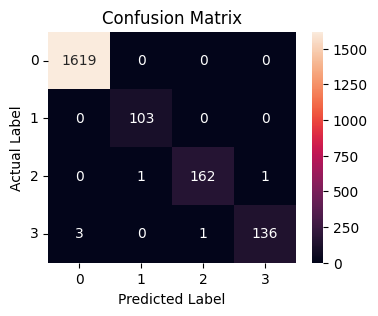

In [137]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

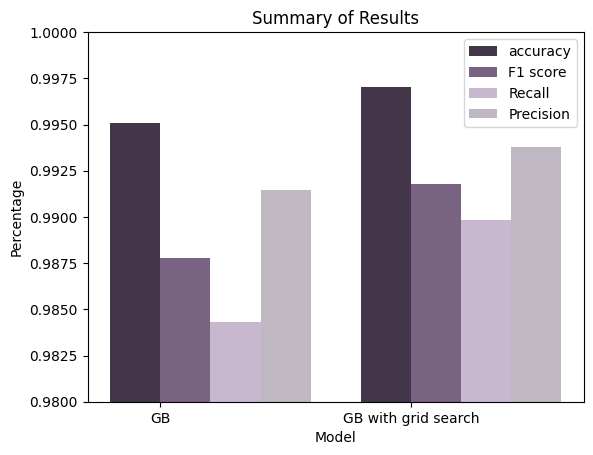

In [138]:
Model = ['GB','GB with grid search']
Accuracy = [gb_acc, gb_grid_search_acc]
F1_score = [gb_f1, gb_grid_search_f1]
Recall= [gb_rec,gb_grid_search_rec]
Precision= [gb_pre,gb_grid_search_pre]

X_axis = np.arange(len(Model))
plt.bar(X_axis+0.1, Accuracy, color='#423648' ,width = 0.20,label = 'accuracy')
plt.bar(X_axis+0.30, F1_score, color='#786383',width = 0.20,label = 'F1 score')
plt.bar(X_axis+0.50, Recall, color='#C7B8CF',width = 0.20,label = 'Recall')
plt.bar(X_axis+0.70, Precision, color='#BFB8C3',width = 0.20,label = 'Precision')

plt.xticks(X_axis+0.20,Model)
plt.ylim(0.98, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Model')
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

# XG boost

**Simple XG Boost**

In [139]:
XGb=xgb.XGBClassifier()
XGb.fit(X_train, y_train)
y_pred_train=XGb.predict(X_train)
y_pred= XGb.predict(X_test)
XGb_train_acc= accuracy_score(y_train, y_pred_train)
XGb_acc= accuracy_score(y_test, y_pred)
XGb_f1= f1_score(y_test, y_pred, average='macro')
XGb_rec= recall_score(y_test, y_pred, average='macro')
XGb_pre= precision_score(y_test, y_pred, average='macro')
print('Train accuracy= ',XGb_train_acc)
print('Accuracy= ',XGb_acc)
print('F1 score= ',XGb_f1)
print('Recall= ',XGb_rec)
print('Precision= ',XGb_pre)

Train accuracy=  1.0
Accuracy=  0.9970384995064165
F1 score=  0.9917546471120644
Recall=  0.989808362369338
Precision=  0.9937752018881093


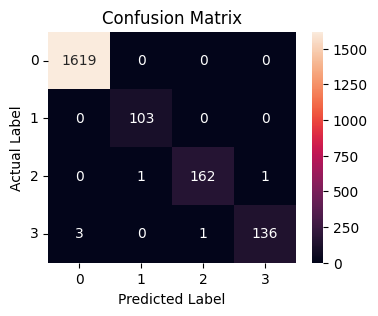

In [140]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

**XG Boost with grid search**

In [142]:
XGb= xgb.XGBClassifier()
param_grid = {'n_estimators':[100,200],'learning_rate':[0.1, 0.01],'max_depth': [8,16]}
grid_search = GridSearchCV(XGb, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_numOfEstimators = grid_search.best_params_['n_estimators']
best_learningRate = grid_search.best_params_['learning_rate']
best_maxDepth = grid_search.best_params_['max_depth']
best_score=grid_search.best_score_
print('Best number of estimators: ', best_numOfEstimators)
print('Best learning rate value : ', best_learningRate)
print('Best max depth value : ', best_maxDepth )
print('Best score: ',best_score)

Best number of estimators:  200
Best learning rate value :  0.01
Best max depth value :  16
Best score:  0.9970382556111529


In [143]:
y_pred_train=grid_search.predict(X_train)
y_pred=grid_search.predict(X_test)
XGb_grid_search_train_acc= accuracy_score(y_train, y_pred_train)
XGb_grid_search_acc= accuracy_score(y_test, y_pred)
XGb_grid_search_f1= f1_score(y_test, y_pred, average='macro')
XGb_grid_search_rec= recall_score(y_test,y_pred,average='macro')
XGb_grid_search_pre=  precision_score(y_test,y_pred,average='macro')
print('Train accuracy: ',XGb_grid_search_train_acc)
print('Accuracy= ',XGb_grid_search_acc)
print('F1 score= ',XGb_grid_search_f1)
print('Recall= ',XGb_grid_search_rec)
print('Precision= ',XGb_grid_search_pre)

Train accuracy:  0.9995063556707392
Accuracy=  0.9960513326752222
F1 score=  0.9891437424598238
Recall=  0.9881295558190737
Precision=  0.9901945831567187


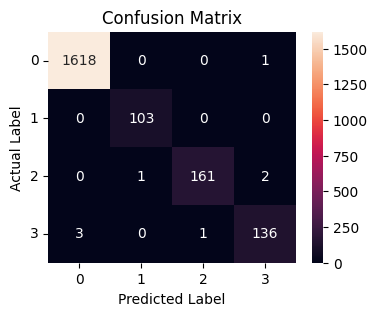

In [144]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
class_labels = ['0', '1','2','3']
plt.xticks(ticks=[0.5, 1.5, 2.5,3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5,2.5,3.5], labels=class_labels, rotation=0)
plt.show()

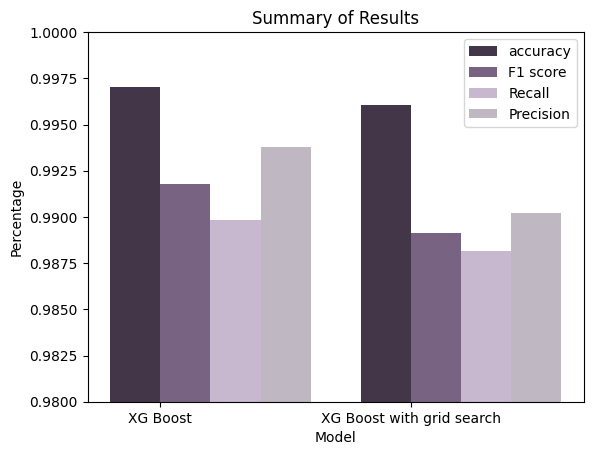

In [145]:
Model = ['XG Boost','XG Boost with grid search']
Accuracy = [XGb_acc, XGb_grid_search_acc]
F1_score = [XGb_f1, XGb_grid_search_f1]
Recall= [XGb_rec,XGb_grid_search_rec]
Precision= [XGb_pre,XGb_grid_search_pre]

X_axis = np.arange(len(Model))
plt.bar(X_axis+0.1, Accuracy, color='#423648' ,width = 0.20,label = 'accuracy')
plt.bar(X_axis+0.30, F1_score, color='#786383',width = 0.20,label = 'F1 score')
plt.bar(X_axis+0.50, Recall, color='#C7B8CF',width = 0.20,label = 'Recall')
plt.bar(X_axis+0.70, Precision, color='#BFB8C3',width = 0.20,label = 'Precision')

plt.xticks(X_axis+0.20,Model)
plt.ylim(0.98, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Model')
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

# Models comparison

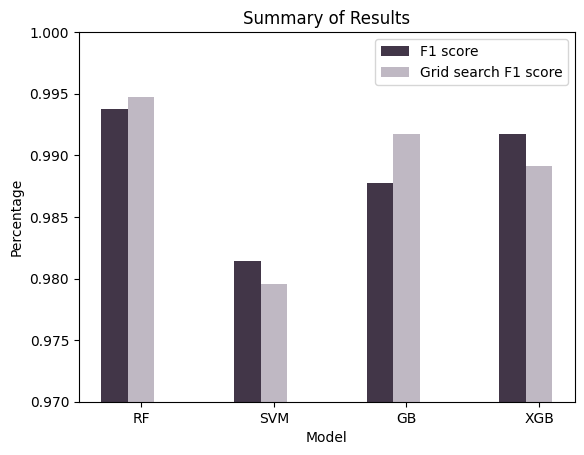

In [149]:
Model= ['RF','SVM','GB','XGB']
F1_score= [rf_f1,svm_f1,gb_f1,XGb_f1]
Grid_search_F1_score= [rf_grid_search_f1,svm_grid_search_f1,gb_grid_search_f1,XGb_grid_search_f1]
X_axis = np.arange(len(Model))
(X_axis+0.1)
plt.bar(X_axis+0.1, F1_score, color='#423648' ,width = 0.20,label = 'F1 score')
plt.bar(X_axis+0.30, Grid_search_F1_score, color='#BFB8C3',width = 0.20,label = 'Grid search F1 score')
plt.xticks(X_axis+0.30,Model)
plt.ylim(0.97, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Model')
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

From the plot above that show the F1 score values for each algorithm, we can notice that Random forest was the best among them by having the highest values F1 score whether it was only random forest, or RF with grid search. But it's important to note that as all values for the F1 for all algorithms are above 0.98, which indicates well and generalized performance for all algorithms.